# Data Mergering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#fungsi reduce memory
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


#fungsi untuk memanggil dataframe
def import_data(file):
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

#fungsi untuk info preprocessing data
def preprocessing(df):
    try:
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Duplicated','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].duplicated(keep=False).sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

#fungsi selected column data train
def selected_columns_train(df):
  col_list = [
  'SK_ID_CURR',
  'TARGET',
  'FLAG_OWN_CAR',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'OWN_CAR_AGE',
  'OCCUPATION_TYPE',
  'CNT_FAM_MEMBERS',
  'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_YEAR']
  df = df[col_list]
  return df

  #fungsi selected column data test
def selected_columns_test(df):
  col_list = [
  'SK_ID_CURR',
  'FLAG_OWN_CAR',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'OWN_CAR_AGE',
  'OCCUPATION_TYPE',
  'CNT_FAM_MEMBERS',
  'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_YEAR']
  df = df[col_list]
  return df

## Data Training

In [3]:
df_train = import_data("application_train.csv")
df_train.info()
df_train.head()

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float16(61), float32(4), int16(2), int32(2), int8(37), object(16)
memory usage: 92.4+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train = selected_columns_train(df_train)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int32  
 1   TARGET                      307511 non-null  int8   
 2   FLAG_OWN_CAR                307511 non-null  object 
 3   CNT_CHILDREN                307511 non-null  int8   
 4   AMT_INCOME_TOTAL            307511 non-null  float32
 5   AMT_CREDIT                  307511 non-null  float32
 6   NAME_TYPE_SUITE             306219 non-null  object 
 7   NAME_INCOME_TYPE            307511 non-null  object 
 8   NAME_EDUCATION_TYPE         307511 non-null  object 
 9   NAME_FAMILY_STATUS          307511 non-null  object 
 10  NAME_HOUSING_TYPE           307511 non-null  object 
 11  DAYS_BIRTH                  307511 non-null  int16  
 12  DAYS_EMPLOYED               307511 non-null  int32  
 13  OWN_CAR_AGE   

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,N,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,-637,NaN,Laborers,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,...,-1188,NaN,Core staff,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,-225,26.0,Laborers,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,N,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,-3039,NaN,Laborers,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,N,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,-3038,NaN,Core staff,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train['AGE'] = -df_train['DAYS_BIRTH']/365
df_train['WORKDAY'] =  -df_train['DAYS_EMPLOYED']/365
df_train.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace=True)

df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int32  
 1   TARGET                      307511 non-null  int8   
 2   FLAG_OWN_CAR                307511 non-null  object 
 3   CNT_CHILDREN                307511 non-null  int8   
 4   AMT_INCOME_TOTAL            307511 non-null  float32
 5   AMT_CREDIT                  307511 non-null  float32
 6   NAME_TYPE_SUITE             306219 non-null  object 
 7   NAME_INCOME_TYPE            307511 non-null  object 
 8   NAME_EDUCATION_TYPE         307511 non-null  object 
 9   NAME_FAMILY_STATUS          307511 non-null  object 
 10  NAME_HOUSING_TYPE           307511 non-null  object 
 11  OWN_CAR_AGE                 104582 non-null  float16
 12  OCCUPATION_TYPE             211120 non-null  object 
 13  CNT_FAM_MEMBER

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,WORKDAY
0,100002,1,N,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,Laborers,1.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205
1,100003,0,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,...,Core staff,2.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795
2,100004,0,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,Laborers,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438
3,100006,0,N,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,Laborers,2.0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,8.326027
4,100007,0,N,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,Core staff,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288


## Data Testing

In [6]:
df_test = import_data('application_test.csv')
df_test.info()
df_test.head()

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float16(61), float32(4), int16(2), int32(2), int8(36), object(16)
memory usage: 14.6+ MB


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_test = selected_columns_test(df_test)
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  48744 non-null  int32  
 1   FLAG_OWN_CAR                48744 non-null  object 
 2   CNT_CHILDREN                48744 non-null  int8   
 3   AMT_INCOME_TOTAL            48744 non-null  float32
 4   AMT_CREDIT                  48744 non-null  float32
 5   NAME_TYPE_SUITE             47833 non-null  object 
 6   NAME_INCOME_TYPE            48744 non-null  object 
 7   NAME_EDUCATION_TYPE         48744 non-null  object 
 8   NAME_FAMILY_STATUS          48744 non-null  object 
 9   NAME_HOUSING_TYPE           48744 non-null  object 
 10  DAYS_BIRTH                  48744 non-null  int16  
 11  DAYS_EMPLOYED               48744 non-null  int32  
 12  OWN_CAR_AGE                 16432 non-null  float16
 13  OCCUPATION_TYPE             331

,SK_ID_CURR,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,N,0,135000.0,568800.0,Unaccompanied,Working,Higher education,Married,House / apartment,...,-2329,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,N,0,99000.0,222768.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,-4469,NaN,Low-skill Laborers,2.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Y,0,202500.0,663264.0,NaN,Working,Higher education,Married,House / apartment,...,-4458,5.0,Drivers,2.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,N,2,315000.0,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,-1866,NaN,Sales staff,4.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Y,1,180000.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,-2191,16.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_test['AGE'] = -df_test['DAYS_BIRTH']/365
df_test['WORKDAY'] =  -df_test['DAYS_EMPLOYED']/365
df_test.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace=True)

df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  48744 non-null  int32  
 1   FLAG_OWN_CAR                48744 non-null  object 
 2   CNT_CHILDREN                48744 non-null  int8   
 3   AMT_INCOME_TOTAL            48744 non-null  float32
 4   AMT_CREDIT                  48744 non-null  float32
 5   NAME_TYPE_SUITE             47833 non-null  object 
 6   NAME_INCOME_TYPE            48744 non-null  object 
 7   NAME_EDUCATION_TYPE         48744 non-null  object 
 8   NAME_FAMILY_STATUS          48744 non-null  object 
 9   NAME_HOUSING_TYPE           48744 non-null  object 
 10  OWN_CAR_AGE                 16432 non-null  float16
 11  OCCUPATION_TYPE             33139 non-null  object 
 12  CNT_FAM_MEMBERS             48744 non-null  float16
 13  AMT_REQ_CREDIT_BUREAU_HOUR  426

,SK_ID_CURR,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,WORKDAY
0,100001,N,0,135000.0,568800.0,Unaccompanied,Working,Higher education,Married,House / apartment,...,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,52.715068,6.380822
1,100005,N,0,99000.0,222768.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,Low-skill Laborers,2.0,0.0,0.0,0.0,0.0,0.0,3.0,49.490411,12.243836
2,100013,Y,0,202500.0,663264.0,NaN,Working,Higher education,Married,House / apartment,...,Drivers,2.0,0.0,0.0,0.0,0.0,1.0,4.0,54.898630,12.213699
3,100028,N,2,315000.0,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,Sales staff,4.0,0.0,0.0,0.0,0.0,0.0,3.0,38.290411,5.112329
4,100038,Y,1,180000.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,35.726027,6.002740


## Data Previous Applicant

### Contract Type

In [9]:
df_prev = import_data('previous_application.csv')
df_prev.info()
df_prev.head()

Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int32  
 1   SK_ID_CURR                   1670214 non-null  int32  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float32
 4   AMT_APPLICATION              1670214 non-null  float32
 5   AMT_CREDIT                   1670213 non-null  float32
 6   AMT_DOWN_PAYMENT             774370 non-null   float32
 7   AMT_GOODS_PRICE              1284699 non-null  float32
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int8   
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_prev['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [11]:
consumer_loans = df_prev[df_prev['NAME_CONTRACT_TYPE']=='Consumer loans']
consumer_loans = consumer_loans.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
consumer_loans = consumer_loans.reset_index()
consumer_loans['CONSUMER_LOAN'] = consumer_loans['SK_ID_PREV']
consumer_loans.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(consumer_loans,how='left',on='SK_ID_CURR')
df_test = df_test.merge(consumer_loans,how='left',on='SK_ID_CURR')

In [12]:
cash_loans = df_prev[df_prev['NAME_CONTRACT_TYPE'] == 'Cash loans']
cash_loans = cash_loans.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
cash_loans = cash_loans.reset_index()
cash_loans['CASH_LOAN'] = cash_loans['SK_ID_PREV']
cash_loans.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(cash_loans,how='left',on='SK_ID_CURR')
df_test = df_test.merge(cash_loans,how='left',on='SK_ID_CURR')

In [13]:
revolving_loans = df_prev[df_prev['NAME_CONTRACT_TYPE'] == 'Revolving loans']
revolving_loans = revolving_loans.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
revolving_loans = revolving_loans.reset_index()
revolving_loans['REVOLVING_LOANS'] = revolving_loans['SK_ID_PREV']
revolving_loans.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(revolving_loans,how='left',on='SK_ID_CURR')
df_test = df_test.merge(revolving_loans,how='left',on='SK_ID_CURR')

### Approved Credit

#### High Approved Credit

In [14]:
df_prev['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [15]:
high_app_credit = df_prev.groupby('SK_ID_CURR')['AMT_CREDIT'].max().reset_index()
high_app_credit['HIGH_APPROVAL_CREDIT'] = high_app_credit['AMT_CREDIT']
high_app_credit.drop('AMT_CREDIT',axis=1,inplace=True)
df_train = df_train.merge(high_app_credit,how='left',on='SK_ID_CURR')
df_test = df_test.merge(high_app_credit,how='left',on='SK_ID_CURR')

#### Average Approved Credit

In [16]:
avg_app_credit = df_prev.groupby('SK_ID_CURR')['AMT_CREDIT'].mean().reset_index()
avg_app_credit['AVERAGE_APPROVAL_CREDIT'] = avg_app_credit['AMT_CREDIT']
avg_app_credit.drop('AMT_CREDIT',axis=1,inplace=True)
df_train = df_train.merge(avg_app_credit,how='left',on='SK_ID_CURR')
df_test = df_test.merge(avg_app_credit,how='left',on='SK_ID_CURR')

### Flag

In [17]:
flag = df_prev[df_prev['FLAG_LAST_APPL_PER_CONTRACT'] == 'Y']
flag = flag.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index()
flag['FLAG'] = flag['SK_ID_PREV']
flag.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(flag,how='left',on='SK_ID_CURR')
df_test = df_test.merge(flag,how='left',on='SK_ID_CURR')

### Downpayment

#### High Downpayment

In [18]:
df_prev['RATE_DOWN_PAYMENT'].describe()

count    774370.000000
mean          0.000000
std           0.000000
min          -0.000015
25%           0.000000
50%           0.051605
75%           0.108887
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64

In [19]:
high_downpayment = df_prev.groupby('SK_ID_CURR')['RATE_DOWN_PAYMENT'].max().reset_index()
high_downpayment['HIGH_RATE_DOWN_PAYMENT'] = high_downpayment['RATE_DOWN_PAYMENT']
high_downpayment.drop('RATE_DOWN_PAYMENT',axis=1,inplace=True)
df_train = df_train.merge(high_downpayment,how='left',on='SK_ID_CURR')
df_test = df_test.merge(high_downpayment,how='left',on='SK_ID_CURR')

#### Average Downpayment

In [20]:
avg_downpayment = df_prev.groupby('SK_ID_CURR')['RATE_DOWN_PAYMENT'].mean().reset_index()
avg_downpayment['AVERAGE_RATE_DOWN_PAYMENT'] = avg_downpayment['RATE_DOWN_PAYMENT']
avg_downpayment.drop('RATE_DOWN_PAYMENT',axis=1,inplace=True)
df_train = df_train.merge(avg_downpayment,how='left',on='SK_ID_CURR')
df_test = df_test.merge(avg_downpayment,how='left',on='SK_ID_CURR')

### Name Portfolio

In [21]:
df_prev['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [22]:
cards = df_prev[df_prev['NAME_PORTFOLIO']=='Cards']
cards = cards.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
cards = cards.reset_index()
cards['CARDS'] = cards['SK_ID_PREV']
cards.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(cards,how='left',on='SK_ID_CURR')
df_test = df_test.merge(cards,how='left',on='SK_ID_CURR')

In [23]:
pos = df_prev[df_prev['NAME_PORTFOLIO']=='POS']
pos = pos.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
pos = pos.reset_index()
pos['POS'] = pos['SK_ID_PREV']
pos.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(pos,how='left',on='SK_ID_CURR')
df_test = df_test.merge(pos,how='left',on='SK_ID_CURR')

In [24]:
cash = df_prev[df_prev['NAME_PORTFOLIO']=='Cash']
cash = cash.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
cash = cash.reset_index()
cash['CASH'] = cash['SK_ID_PREV']
cash.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(cash,how='left',on='SK_ID_CURR')
df_test = df_test.merge(cash,how='left',on='SK_ID_CURR')

## Bureau

In [25]:
df_bureau = import_data('bureau.csv')
df_bureau.info()
df_bureau.head()

Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int32  
 1   SK_ID_BUREAU            int32  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int16  
 5   CREDIT_DAY_OVERDUE      int16  
 6   DAYS_CREDIT_ENDDATE     float16
 7   DAYS_ENDDATE_FACT       float16
 8   AMT_CREDIT_MAX_OVERDUE  float32
 9   CNT_CREDIT_PROLONG      int8   
 10  AMT_CREDIT_SUM          float32
 11  AMT_CREDIT_SUM_DEBT     float32
 12  AMT_CREDIT_SUM_LIMIT    float32
 13  AMT_CREDIT_SUM_OVERDUE  float32
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int32  
 16  AMT_ANNUITY             float32
dtypes: float16(2), float32(6), int16(2), int32(3), int8(1), object(3)
memory us

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### Credit Active

In [26]:
credit_active = df_bureau[df_bureau['CREDIT_ACTIVE']=='Active']
credit_active = credit_active.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().reset_index()
credit_active['CREDIT_ACTIVE'] = credit_active['SK_ID_BUREAU']
credit_active.drop('SK_ID_BUREAU',axis=1,inplace=True)
df_train = df_train.merge(credit_active,how='left',on='SK_ID_CURR')
df_test = df_test.merge(credit_active,how='left',on='SK_ID_CURR')

### Credit Overdue

In [27]:
credit_overdue = df_bureau.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].sum().reset_index()
df_train = df_train.merge(credit_overdue,how='left',on='SK_ID_CURR')
df_test = df_test.merge(credit_overdue,how='left',on='SK_ID_CURR')

### Credit Type

In [28]:
df_bureau['CREDIT_TYPE'].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

In [29]:
consumer_credit = df_bureau[df_bureau['CREDIT_TYPE']=='Consumer credit']
consumer_credit = consumer_credit.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique()
consumer_credit = consumer_credit.reset_index()
consumer_credit['CONSUMER_CREDIT'] = consumer_credit['SK_ID_BUREAU']
consumer_credit.drop('SK_ID_BUREAU',axis=1,inplace=True)
df_train = df_train.merge(consumer_credit,how='left',on='SK_ID_CURR')
df_test = df_test.merge(consumer_credit,how='left',on='SK_ID_CURR')

In [30]:
car_loan = df_bureau[df_bureau['CREDIT_TYPE']=='Car loan']
car_loan = car_loan.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique()
car_loan = car_loan.reset_index()
car_loan['CAR_LOAN'] = car_loan['SK_ID_BUREAU']
car_loan.drop('SK_ID_BUREAU',axis=1,inplace=True)
df_train = df_train.merge(car_loan,how='left',on='SK_ID_CURR')
df_test = df_test.merge(car_loan,how='left',on='SK_ID_CURR')

In [31]:
mortgage = df_bureau[df_bureau['CREDIT_TYPE']=='Mortgage']
mortgage = mortgage.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique()
mortgage = mortgage.reset_index()
mortgage['MORGAGE'] = mortgage['SK_ID_BUREAU']
mortgage.drop('SK_ID_BUREAU',axis=1,inplace=True)
df_train = df_train.merge(mortgage,how='left',on='SK_ID_CURR')
df_test = df_test.merge(mortgage,how='left',on='SK_ID_CURR')

In [32]:
microloan = df_bureau[df_bureau['CREDIT_TYPE']=='Microloan']
microloan = microloan.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique()
microloan = microloan.reset_index()
microloan['MICROLOAN'] = microloan['SK_ID_BUREAU']
microloan.drop('SK_ID_BUREAU',axis=1,inplace=True)
df_train = df_train.merge(microloan,how='left',on='SK_ID_CURR')
df_test = df_test.merge(microloan,how='left',on='SK_ID_CURR')

### Installment

In [33]:
installment = import_data('installments_payments.csv')
installment.info()
installment.head()

Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int32  
 1   SK_ID_CURR              int32  
 2   NUM_INSTALMENT_VERSION  float16
 3   NUM_INSTALMENT_NUMBER   int16  
 4   DAYS_INSTALMENT         float16
 5   DAYS_ENTRY_PAYMENT      float16
 6   AMT_INSTALMENT          float32
 7   AMT_PAYMENT             float32
dtypes: float16(3), float32(2), int16(1), int32(2)
memory usage: 311.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


In [34]:
installment['PAY_DAY'] = installment['DAYS_INSTALMENT']-installment['DAYS_ENTRY_PAYMENT']

payday = installment[['SK_ID_CURR','SK_ID_PREV','PAY_DAY']]

In [35]:
payday_1 = payday[(payday['PAY_DAY']<1)&(payday['PAY_DAY']>=-30)]
payday_1 = payday_1.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index()
payday_1['PAY_INST_1'] = payday_1['SK_ID_PREV']
payday_1.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(payday_1,how='left',on='SK_ID_CURR')
df_test = df_test.merge(payday_1,how='left',on='SK_ID_CURR')

In [36]:
payday_30 = payday[(payday['PAY_DAY']>=1)&(payday['PAY_DAY']<30)]
payday_30 = payday_30.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index()
payday_30['PAY_INST_30'] = payday_30['SK_ID_PREV']
payday_30.drop('SK_ID_PREV',axis=1,inplace=True)
df_train = df_train.merge(payday_30,how='left',on='SK_ID_CURR')
df_test = df_test.merge(payday_30,how='left',on='SK_ID_CURR')

### POSH

In [37]:
posh = import_data('POS_CASH_balance.csv')
posh.info()
posh.head()

Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int32  
 1   SK_ID_CURR             int32  
 2   MONTHS_BALANCE         int8   
 3   CNT_INSTALMENT         float16
 4   CNT_INSTALMENT_FUTURE  float16
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int16  
 7   SK_DPD_DEF             int16  
dtypes: float16(2), int16(2), int32(2), int8(1), object(1)
memory usage: 238.5+ MB


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [38]:
posh['CNT_DIFF'] = posh['CNT_INSTALMENT_FUTURE']-posh['CNT_INSTALMENT']

In [39]:
cnt_diff = posh.groupby('SK_ID_CURR')['CNT_DIFF'].sum().reset_index()
df_train = df_train.merge(cnt_diff,how='left',on='SK_ID_CURR')
df_test = df_test.merge(cnt_diff,how='left',on='SK_ID_CURR')

In [40]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int32  
 1   TARGET                      307511 non-null  int8   
 2   FLAG_OWN_CAR                307511 non-null  object 
 3   CNT_CHILDREN                307511 non-null  int8   
 4   AMT_INCOME_TOTAL            307511 non-null  float32
 5   AMT_CREDIT                  307511 non-null  float32
 6   NAME_TYPE_SUITE             306219 non-null  object 
 7   NAME_INCOME_TYPE            307511 non-null  object 
 8   NAME_EDUCATION_TYPE         307511 non-null  object 
 9   NAME_FAMILY_STATUS          307511 non-null  object 
 10  NAME_HOUSING_TYPE           307511 non-null  object 
 11  OWN_CAR_AGE                 104582 non-null  float16
 12  OCCUPATION_TYPE             211120 non-null  object 
 13  CNT_FAM_MEMBER

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,CASH,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,CONSUMER_CREDIT,CAR_LOAN,MORGAGE,MICROLOAN,PAY_INST_1,PAY_INST_30,CNT_DIFF
0,100002,1,N,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,NaN,2.0,0.0,4.0,NaN,NaN,NaN,NaN,1.0,-171.0
1,100003,0,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,...,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,3.0,-121.0
2,100004,0,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,1.0,-6.0
3,100006,0,N,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-67.0
4,100007,0,N,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,4.0,NaN,0.0,1.0,NaN,NaN,NaN,4.0,4.0,-420.0


In [41]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  48744 non-null  int32  
 1   FLAG_OWN_CAR                48744 non-null  object 
 2   CNT_CHILDREN                48744 non-null  int8   
 3   AMT_INCOME_TOTAL            48744 non-null  float32
 4   AMT_CREDIT                  48744 non-null  float32
 5   NAME_TYPE_SUITE             47833 non-null  object 
 6   NAME_INCOME_TYPE            48744 non-null  object 
 7   NAME_EDUCATION_TYPE         48744 non-null  object 
 8   NAME_FAMILY_STATUS          48744 non-null  object 
 9   NAME_HOUSING_TYPE           48744 non-null  object 
 10  OWN_CAR_AGE                 16432 non-null  float16
 11  OCCUPATION_TYPE             33139 non-null  object 
 12  CNT_FAM_MEMBERS             48744 non-null  float16
 13  AMT_REQ_CREDIT_BUREAU_HOUR  426

,SK_ID_CURR,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CASH,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,CONSUMER_CREDIT,CAR_LOAN,MORGAGE,MICROLOAN,PAY_INST_1,PAY_INST_30,CNT_DIFF
0,100001,N,0,135000.0,568800.0,Unaccompanied,Working,Higher education,Married,House / apartment,...,NaN,3.0,0.0,7.0,NaN,NaN,NaN,1.0,1.0,-23.0
1,100005,N,0,99000.0,222768.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,NaN,2.0,0.0,2.0,NaN,NaN,NaN,1.0,1.0,-45.0
2,100013,Y,0,202500.0,663264.0,NaN,Working,Higher education,Married,House / apartment,...,1.0,NaN,0.0,2.0,2.0,NaN,NaN,3.0,4.0,-219.0
3,100028,N,2,315000.0,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,NaN,5.0,0.0,7.0,NaN,NaN,NaN,1.0,3.0,-317.0
4,100038,Y,1,180000.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-80.0


# Preprocessing

In [42]:
preprocessing(df_train)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
SK_ID_CURR,307511,0.000000,0,int32,"[100002, 100003, 100004, 100006, 100007, 10000..."
TARGET,2,0.000000,307511,int8,"[1, 0]"
FLAG_OWN_CAR,2,0.000000,307511,object,"[N, Y]"
CNT_CHILDREN,15,0.000000,307510,int8,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,..."
AMT_INCOME_TOTAL,2548,0.000000,305665,float32,"[202500.0, 270000.0, 67500.0, 135000.0, 121500..."
AMT_CREDIT,5603,0.000000,306005,float32,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
NAME_TYPE_SUITE,7,0.420148,307511,object,"[Unaccompanied, Family, Spouse, partner, Child..."
NAME_INCOME_TYPE,8,0.000000,307511,object,"[Working, State servant, Commercial associate,..."
NAME_EDUCATION_TYPE,5,0.000000,307511,object,"[Secondary / secondary special, Higher educati..."


In [43]:
df_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
FLAG_OWN_CAR                       0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AGE                                0
WORKDAY                            0
CONSUMER_LOAN                  38488
CASH_LOAN                     136129
REVOLVING_LOANS               203452
HIGH_APPROVAL_CREDIT           16454
AVERAGE_APPROVAL_CREDIT        16454
F

## Data Cleaning

### Handling Missing Value

In [44]:
#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(df,colName):
    # .mode()[0] - gives first category name
     most_frequent_category=df[colName].mode()[0]
    
    # replace nan values with most occured category
     df[colName + '_Imputed'] = df[colName]
     df[colName + '_Imputed'].fillna(most_frequent_category,inplace=True)
#2. Call function to impute most occured category
for columns in ['NAME_TYPE_SUITE','OCCUPATION_TYPE']:
    impute_nan_most_frequent_category(df_train,columns)
    
# Display imputed result
df_train[['NAME_TYPE_SUITE','NAME_TYPE_SUITE_Imputed','OCCUPATION_TYPE','OCCUPATION_TYPE_Imputed']].head(10)

,NAME_TYPE_SUITE,NAME_TYPE_SUITE_Imputed,OCCUPATION_TYPE,OCCUPATION_TYPE_Imputed
0,Unaccompanied,Unaccompanied,Laborers,Laborers
1,Family,Family,Core staff,Core staff
2,Unaccompanied,Unaccompanied,Laborers,Laborers
3,Unaccompanied,Unaccompanied,Laborers,Laborers
4,Unaccompanied,Unaccompanied,Core staff,Core staff
5,"Spouse, partner","Spouse, partner",Laborers,Laborers
6,Unaccompanied,Unaccompanied,Accountants,Accountants
7,Unaccompanied,Unaccompanied,Managers,Managers
8,Children,Children,NaN,Laborers
9,Unaccompanied,Unaccompanied,Laborers,Laborers


In [45]:
df_train['NAME_TYPE_SUITE'] = df_train['NAME_TYPE_SUITE_Imputed']
df_train.drop('NAME_TYPE_SUITE_Imputed',axis=1,inplace=True)

df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE_Imputed']
df_train.drop('OCCUPATION_TYPE_Imputed',axis=1,inplace=True)

In [46]:
number_null = [
  'OWN_CAR_AGE',
  'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_YEAR',
  'CONSUMER_LOAN',
  'CASH_LOAN',
  'REVOLVING_LOANS',
  'HIGH_APPROVAL_CREDIT',
  'AVERAGE_APPROVAL_CREDIT',
  'FLAG',
  'HIGH_RATE_DOWN_PAYMENT',
  'AVERAGE_RATE_DOWN_PAYMENT',
  'CARDS',
  'POS',
  'CASH',
  'CREDIT_ACTIVE',
  'CREDIT_DAY_OVERDUE',
  'CONSUMER_CREDIT',
  'CAR_LOAN',
  'MORGAGE',
  'MICROLOAN',
  'PAY_INST_1',
  'PAY_INST_30',
  'CNT_DIFF']

In [47]:
#1. Function to replace NAN values with 0
def impute_nan_to_zero(df,colName):    
    # replace nan values with 0
     df[colName + '_Imputed'] = df[colName]
     df[colName + '_Imputed'].fillna(0,inplace=True)
#2. Call function
for columns in number_null:
    impute_nan_to_zero(df_train,columns)

df_train.drop(columns = number_null,axis=1,inplace=True)

In [48]:
new_numeric_col = [
  'OWN_CAR_AGE_Imputed',
  'AMT_REQ_CREDIT_BUREAU_HOUR_Imputed',
  'AMT_REQ_CREDIT_BUREAU_DAY_Imputed',
  'AMT_REQ_CREDIT_BUREAU_WEEK_Imputed',
  'AMT_REQ_CREDIT_BUREAU_MON_Imputed',
  'AMT_REQ_CREDIT_BUREAU_QRT_Imputed',
  'AMT_REQ_CREDIT_BUREAU_YEAR_Imputed',
  'CONSUMER_LOAN_Imputed',
  'CASH_LOAN_Imputed',
  'REVOLVING_LOANS_Imputed',
  'HIGH_APPROVAL_CREDIT_Imputed',
  'AVERAGE_APPROVAL_CREDIT_Imputed',
  'FLAG_Imputed',
  'HIGH_RATE_DOWN_PAYMENT_Imputed',
  'AVERAGE_RATE_DOWN_PAYMENT_Imputed',
  'CARDS_Imputed',
  'POS_Imputed',
  'CASH_Imputed',
  'CREDIT_ACTIVE_Imputed',
  'CREDIT_DAY_OVERDUE_Imputed',
  'CONSUMER_CREDIT_Imputed',
  'CAR_LOAN_Imputed',
  'MORGAGE_Imputed',
  'MICROLOAN_Imputed',
  'PAY_INST_1_Imputed',
  'PAY_INST_30_Imputed',
  'CNT_DIFF_Imputed'
]

In [49]:
df_train[number_null] = df_train[new_numeric_col]
df_train.drop(df_train[new_numeric_col],axis=1,inplace=True)

In [50]:
df_train.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,CASH,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,CONSUMER_CREDIT,CAR_LOAN,MORGAGE,MICROLOAN,PAY_INST_1,PAY_INST_30,CNT_DIFF
0,100002,1,N,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,-171.0
1,100003,0,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,-121.0
2,100004,0,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,-6.0
3,100006,0,N,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-67.0
4,100007,0,N,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,4.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,-420.0


In [51]:
preprocessing(df_train)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
SK_ID_CURR,307511,0.00000,0,int32,"[100002, 100003, 100004, 100006, 100007, 10000..."
TARGET,2,0.00000,307511,int8,"[1, 0]"
FLAG_OWN_CAR,2,0.00000,307511,object,"[N, Y]"
CNT_CHILDREN,15,0.00000,307510,int8,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,..."
AMT_INCOME_TOTAL,2548,0.00000,305665,float32,"[202500.0, 270000.0, 67500.0, 135000.0, 121500..."
AMT_CREDIT,5603,0.00000,306005,float32,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
NAME_TYPE_SUITE,7,0.00000,307511,object,"[Unaccompanied, Family, Spouse, partner, Child..."
NAME_INCOME_TYPE,8,0.00000,307511,object,"[Working, State servant, Commercial associate,..."
NAME_EDUCATION_TYPE,5,0.00000,307511,object,"[Secondary / secondary special, Higher educati..."


In [52]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE', 'WORKDAY', 'OWN_CAR_AGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CONSUMER_LOAN', 'CASH_LOAN', 'REVOLVING_LOANS', 'HIGH_APPROVAL_CREDIT',
       'AVERAGE_APPROVAL_CREDIT', 'FLAG', 'HIGH_RATE_DOWN_PAYMENT',
       'AVERAGE_RATE_DOWN_PAYMENT', 'CARDS', 'POS', 'CASH', 'CREDIT_ACTIVE',
       'CREDIT_DAY_OVERDUE', 'CONSUMER_CREDIT', 'CAR_LOAN', 'MORGAGE',
       'MICROLOAN', 'PAY_INST_1', 'PAY_INST_30', 'CNT_DIFF'],
      dtype='object')

In [53]:
#2. Call function to impute most occured category
for columns in ['NAME_TYPE_SUITE','OCCUPATION_TYPE']:
    impute_nan_most_frequent_category(df_test,columns)

In [54]:
df_test['NAME_TYPE_SUITE'] = df_test['NAME_TYPE_SUITE_Imputed']
df_test.drop('NAME_TYPE_SUITE_Imputed',axis=1,inplace=True)

df_test['OCCUPATION_TYPE'] = df_test['OCCUPATION_TYPE_Imputed']
df_test.drop('OCCUPATION_TYPE_Imputed',axis=1,inplace=True)

In [55]:
#2. Call function
for columns in number_null:
    impute_nan_to_zero(df_test,columns)

df_test.drop(columns = number_null,axis=1,inplace=True)

In [56]:
df_test[number_null] = df_test[new_numeric_col]
df_test.drop(df_test[new_numeric_col],axis=1,inplace=True)

### Handling Duplicate Data

In [57]:
df_train.duplicated().sum()

0

### Handling Outlier

In [58]:
numeric = [
  'AMT_INCOME_TOTAL',
  'AGE',
  'WORKDAY',
  'HIGH_APPROVAL_CREDIT',
  'AVERAGE_APPROVAL_CREDIT',
  'HIGH_RATE_DOWN_PAYMENT',
  'AVERAGE_RATE_DOWN_PAYMENT',
]

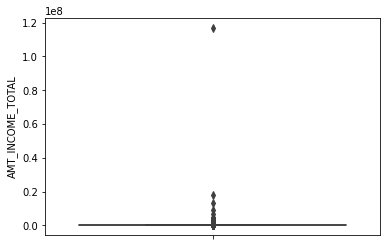

<Figure size 216x216 with 0 Axes>

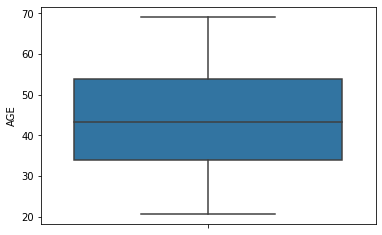

<Figure size 216x216 with 0 Axes>

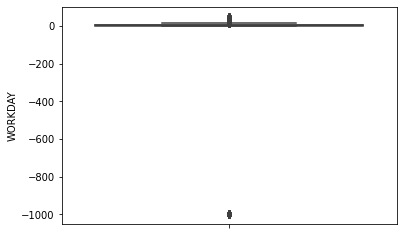

<Figure size 216x216 with 0 Axes>

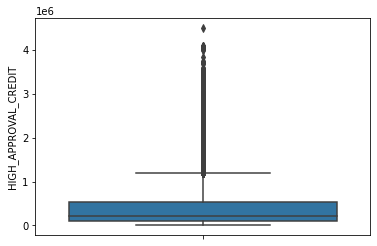

<Figure size 216x216 with 0 Axes>

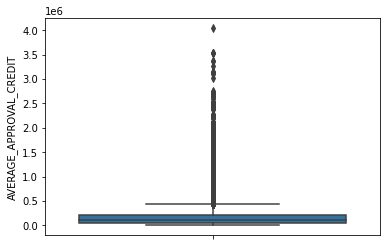

<Figure size 216x216 with 0 Axes>

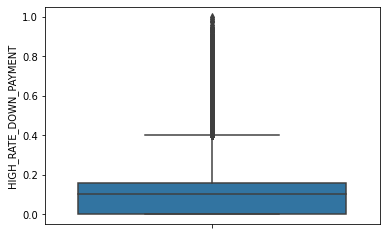

<Figure size 216x216 with 0 Axes>

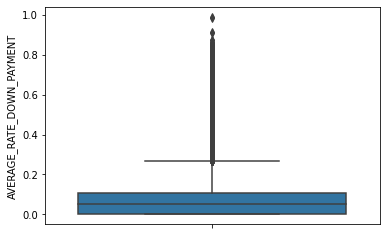

<Figure size 216x216 with 0 Axes>

In [59]:
for j in range (0,len(numeric)):
  num = numeric[j]
  sns.boxplot(y=df_train[num])
  plt.figure(figsize=(3,3))
  plt.show()

In [60]:
def cleaned_outlier(df,colName):
  q1 = df[colName].quantile(0.25)
  q3 = df[colName].quantile(0.75)
  iqr = q3 - q1
  low = q1 - (1.5*iqr)
  high = q3 + (1.5*iqr)
  filtered = df[(df[colName]>=low) & (df[colName]<= high)]
  return filtered

In [61]:
df_train_clean = cleaned_outlier(df_train,'AMT_INCOME_TOTAL')

In [62]:
df_train_clean = cleaned_outlier(df_train_clean,'WORKDAY')

In [63]:
print('Data yang dipakai',round(df_train_clean.shape[0]/df_train.shape[0]*100,2),'%')

Data yang dipakai 72.52 %


In [64]:
df_train_clean.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE', 'WORKDAY', 'OWN_CAR_AGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CONSUMER_LOAN', 'CASH_LOAN', 'REVOLVING_LOANS', 'HIGH_APPROVAL_CREDIT',
       'AVERAGE_APPROVAL_CREDIT', 'FLAG', 'HIGH_RATE_DOWN_PAYMENT',
       'AVERAGE_RATE_DOWN_PAYMENT', 'CARDS', 'POS', 'CASH', 'CREDIT_ACTIVE',
       'CREDIT_DAY_OVERDUE', 'CONSUMER_CREDIT', 'CAR_LOAN', 'MORGAGE',
       'MICROLOAN', 'PAY_INST_1', 'PAY_INST_30', 'CNT_DIFF'],
      dtype='object')

In [65]:
df_train_clean.shape

(223008, 42)

In [66]:
df_train_clean.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,CASH,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,CONSUMER_CREDIT,CAR_LOAN,MORGAGE,MICROLOAN,PAY_INST_1,PAY_INST_30,CNT_DIFF
0,100002,1,N,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,-171.0
1,100003,0,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,-121.0
2,100004,0,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,-6.0
3,100006,0,N,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-67.0
4,100007,0,N,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,4.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,-420.0


# Exploratory Data Analysis (EDA)

### Univariate

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


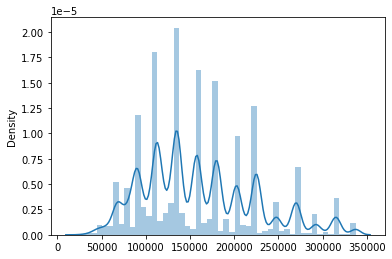

<Figure size 216x216 with 0 Axes>

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


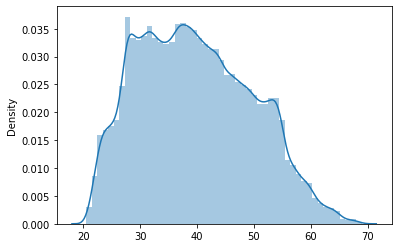

<Figure size 216x216 with 0 Axes>

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


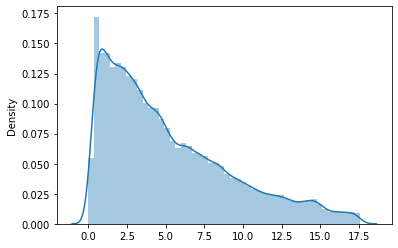

<Figure size 216x216 with 0 Axes>

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


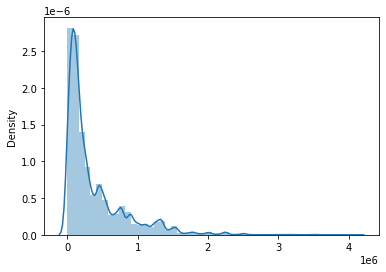

<Figure size 216x216 with 0 Axes>

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


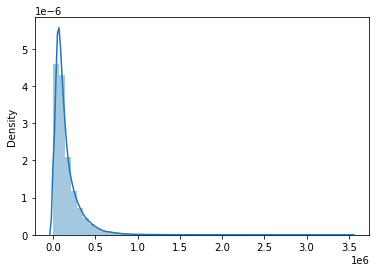

<Figure size 216x216 with 0 Axes>

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


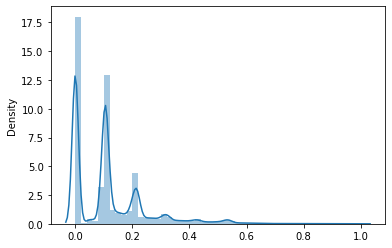

<Figure size 216x216 with 0 Axes>

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


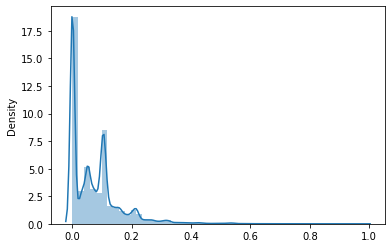

<Figure size 216x216 with 0 Axes>

In [67]:
for i in range (0,len(numeric)):
  num = numeric[i]
  sns.distplot(x=df_train_clean[num])
  plt.figure(figsize=(3,3))
  plt.show()

In [68]:
categorical = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

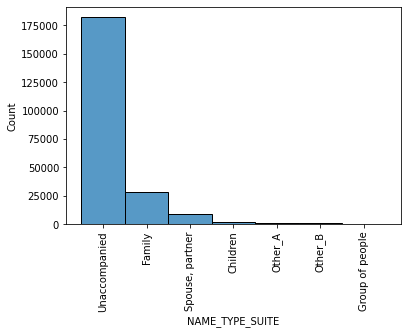

<Figure size 216x216 with 0 Axes>

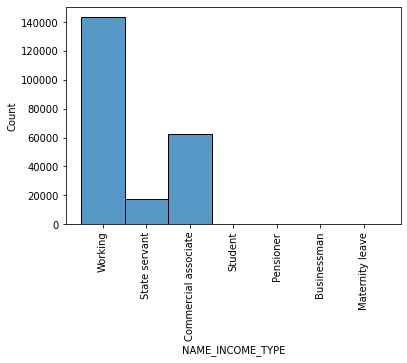

<Figure size 216x216 with 0 Axes>

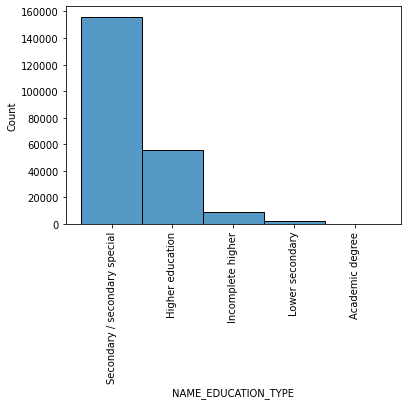

<Figure size 216x216 with 0 Axes>

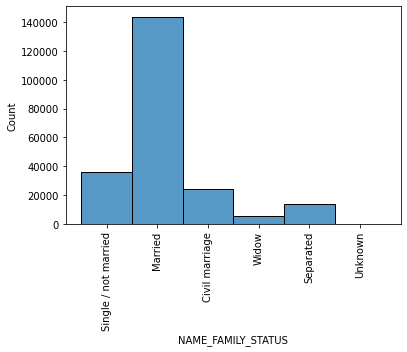

<Figure size 216x216 with 0 Axes>

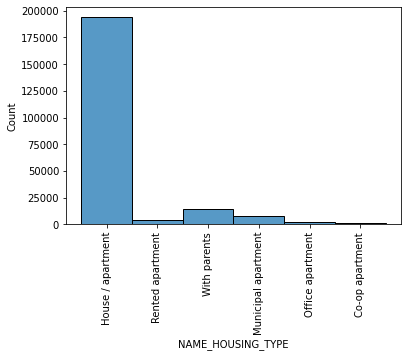

<Figure size 216x216 with 0 Axes>

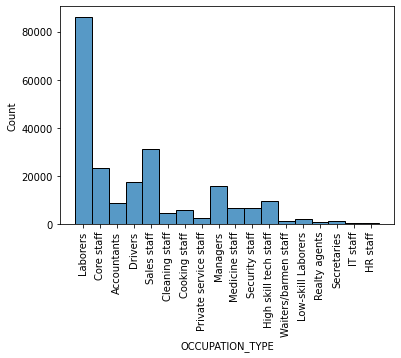

<Figure size 216x216 with 0 Axes>

In [69]:
for i in range (0,len(categorical)):
  cat = categorical[i]
  sns.histplot(x=df_train_clean[cat],kde=False)
  plt.xticks(rotation=90)
  plt.figure(figsize=(3,3))
  plt.show()

### Multivariate

In [70]:
corr_matrix = df_train_clean.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\user\AppData\Local\Temp\ipykernel_13720\2106252166.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [71]:
to_drop_hicorr

['CNT_FAM_MEMBERS',
 'AVERAGE_APPROVAL_CREDIT',
 'FLAG',
 'AVERAGE_RATE_DOWN_PAYMENT',
 'CARDS',
 'POS',
 'CASH',
 'PAY_INST_30']

In [72]:
df_train_clean.drop(to_drop_hicorr, axis=1, inplace=True)

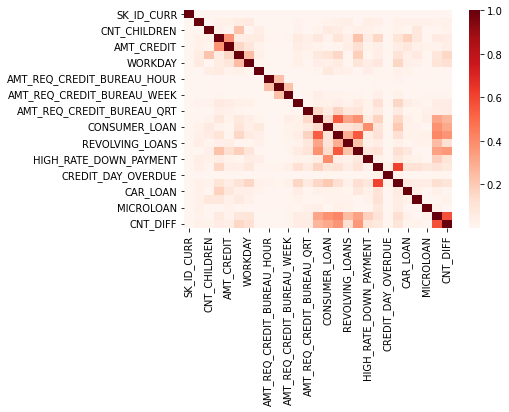

In [73]:
sns.heatmap(df_train_clean.corr().abs(),cmap = 'Reds')
plt.show()

In [74]:
df_train_clean.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'AGE', 'WORKDAY', 'OWN_CAR_AGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CONSUMER_LOAN', 'CASH_LOAN', 'REVOLVING_LOANS', 'HIGH_APPROVAL_CREDIT',
       'HIGH_RATE_DOWN_PAYMENT', 'CREDIT_ACTIVE', 'CREDIT_DAY_OVERDUE',
       'CONSUMER_CREDIT', 'CAR_LOAN', 'MORGAGE', 'MICROLOAN', 'PAY_INST_1',
       'CNT_DIFF'],
      dtype='object')

In [75]:
df_train_clean.to_csv('data_features.csv')

### Bivariate

### Weight of Evidence (WoE) and Information Value (IV)

In [76]:
df_train_clean.drop('SK_ID_CURR',axis=1,inplace=True)

In [77]:
features = df_train_clean.drop(['TARGET'],axis=1)
labels = df_train_clean['TARGET']

In [78]:
labels.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int8

In [79]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223008 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FLAG_OWN_CAR                223008 non-null  object 
 1   CNT_CHILDREN                223008 non-null  int8   
 2   AMT_INCOME_TOTAL            223008 non-null  float32
 3   AMT_CREDIT                  223008 non-null  float32
 4   NAME_TYPE_SUITE             223008 non-null  object 
 5   NAME_INCOME_TYPE            223008 non-null  object 
 6   NAME_EDUCATION_TYPE         223008 non-null  object 
 7   NAME_FAMILY_STATUS          223008 non-null  object 
 8   NAME_HOUSING_TYPE           223008 non-null  object 
 9   OCCUPATION_TYPE             223008 non-null  object 
 10  AGE                         223008 non-null  float64
 11  WORKDAY                     223008 non-null  float64
 12  OWN_CAR_AGE                 223008 non-null  float16
 13  AMT_REQ_CREDIT

In [80]:
features.head()

,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,HIGH_APPROVAL_CREDIT,HIGH_RATE_DOWN_PAYMENT,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,CONSUMER_CREDIT,CAR_LOAN,MORGAGE,MICROLOAN,PAY_INST_1,CNT_DIFF
0,N,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,179055.0,0.000000,2.0,0.0,4.0,0.0,0.0,0.0,0.0,-171.0
1,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,House / apartment,Core staff,...,1035882.0,0.100037,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-121.0
2,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,20106.0,0.212036,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-6.0
3,N,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,...,906615.0,0.217773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-67.0
4,N,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,...,284400.0,0.218872,0.0,0.0,1.0,0.0,0.0,0.0,4.0,-420.0


In [81]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [82]:
final_iv, IV = data_vars(features,labels)

C:\Users\user\AppData\Local\Temp\ipykernel_13720\4227779991.py:25: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
final_iv.sort_values('IV',ascending= False)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
28,NAME_EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,156162,15995.0,0.102426,140167.0,0.897574,0.785956,0.691646,0.127826,0.062998
27,NAME_EDUCATION_TYPE,Lower secondary,Lower secondary,2129,305.0,0.143260,1824.0,0.856740,0.014987,0.009000,0.509909,0.062998
26,NAME_EDUCATION_TYPE,Incomplete higher,Incomplete higher,9013,794.0,0.088095,8219.0,0.911905,0.039015,0.040556,-0.038736,0.062998
25,NAME_EDUCATION_TYPE,Higher education,Higher education,55596,3255.0,0.058547,52341.0,0.941453,0.159943,0.258274,-0.479203,0.062998
24,NAME_EDUCATION_TYPE,Academic degree,Academic degree,108,2.0,0.018519,106.0,0.981481,0.000098,0.000523,-1.671907,0.062998
...,...,...,...,...,...,...,...,...,...,...,...,...
82,AMT_REQ_CREDIT_BUREAU_WEEK,0.0,1.0,222751,20331.0,0.091272,202420.0,0.908728,0.999017,0.998831,0.000187,0.000033
3,CNT_CHILDREN,2,19,27885,2570.0,0.092164,25315.0,0.907836,0.126284,0.124915,0.010894,0.000017
2,CNT_CHILDREN,0,1,195123,17781.0,0.091127,177342.0,0.908873,0.873716,0.875085,-0.001565,0.000017
79,AMT_REQ_CREDIT_BUREAU_HOUR,2.0,4.0,51,5.0,0.098039,46.0,0.901961,0.000246,0.000227,0.079181,0.000001


In [84]:
final_iv.sort_values('WOE',ascending= False)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
19,NAME_INCOME_TYPE,Maternity leave,Maternity leave,4,2.0,0.500000,2.0,0.500000,0.000098,0.000010,2.298385,0.024147
115,MICROLOAN,2.0,79.0,1037,254.0,0.244937,783.0,0.755063,0.012481,0.003864,1.172586,0.010179
105,CREDIT_DAY_OVERDUE,2.0,5134.0,2457,445.0,0.181115,2012.0,0.818885,0.021866,0.009928,0.789575,0.009571
50,OCCUPATION_TYPE,Low-skill Laborers,Low-skill Laborers,2039,358.0,0.175576,1681.0,0.824424,0.017591,0.008295,0.751774,0.058652
27,NAME_EDUCATION_TYPE,Lower secondary,Lower secondary,2129,305.0,0.143260,1824.0,0.856740,0.014987,0.009000,0.509909,0.062998
...,...,...,...,...,...,...,...,...,...,...,...,...
25,NAME_EDUCATION_TYPE,Higher education,Higher education,55596,3255.0,0.058547,52341.0,0.941453,0.159943,0.258274,-0.479203,0.062998
111,CAR_LOAN,2.0,7.0,2184,125.0,0.057234,2059.0,0.942766,0.006142,0.010160,-0.503277,0.002038
41,OCCUPATION_TYPE,Accountants,Accountants,8587,429.0,0.049959,8158.0,0.950041,0.021080,0.040255,-0.646913,0.058652
113,MORGAGE,2.0,13.0,816,29.0,0.035539,787.0,0.964461,0.001425,0.003883,-1.002548,0.002471


In [85]:
IV = IV.rename(columns={'VAR_NAME':'index'})
round((IV.sort_values(['IV'],ascending=0)),2)

,index,IV
22,NAME_EDUCATION_TYPE,0.06
31,WORKDAY,0.06
27,OCCUPATION_TYPE,0.06
0,AGE,0.04
19,HIGH_RATE_DOWN_PAYMENT,0.03
25,NAME_INCOME_TYPE,0.02
30,REVOLVING_LOANS,0.02
23,NAME_FAMILY_STATUS,0.02
13,CONSUMER_CREDIT,0.01
12,CNT_DIFF,0.01


C:\Users\user\AppData\Local\Temp\ipykernel_13720\4227779991.py:25: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


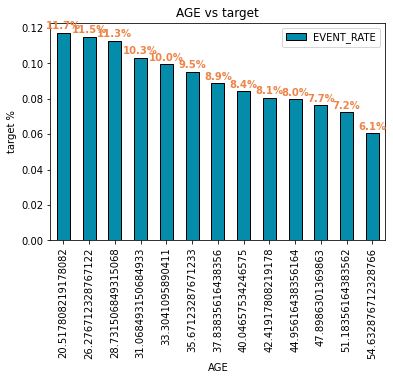

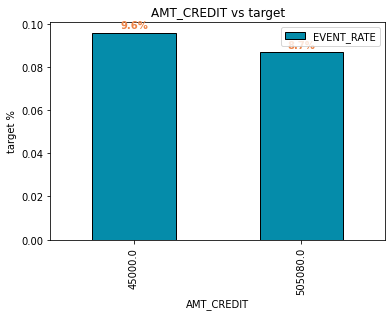

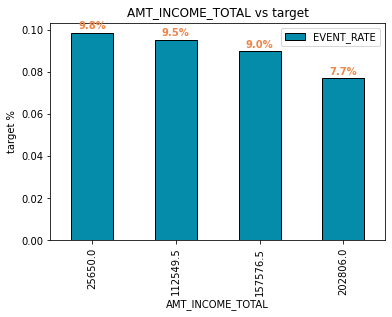

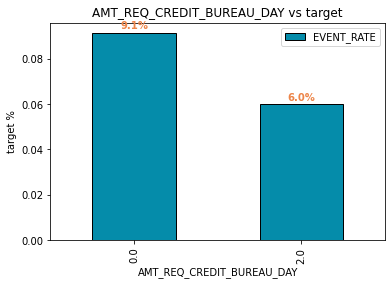

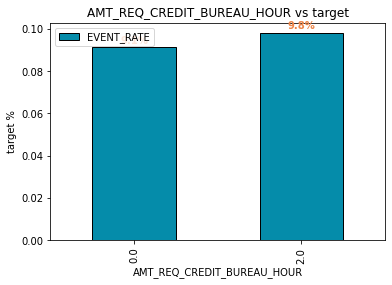

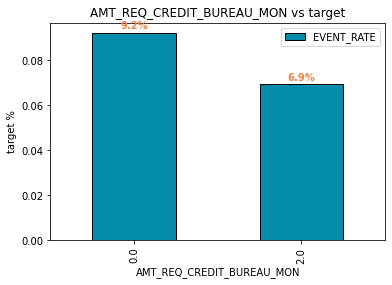

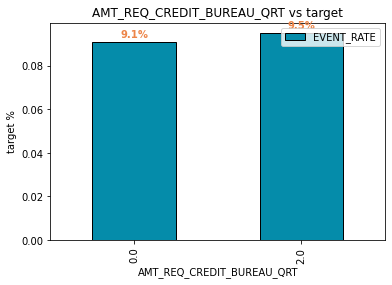

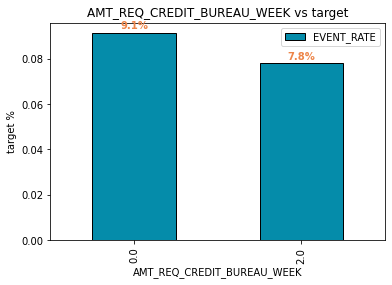

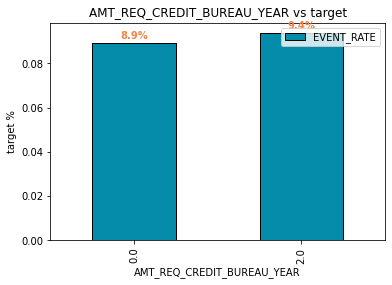

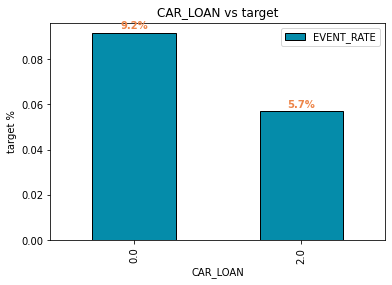

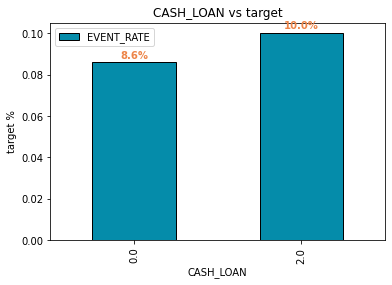

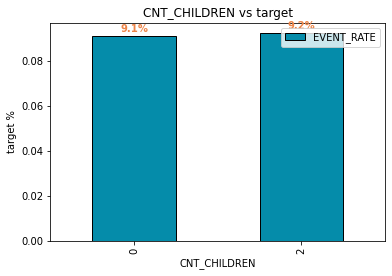

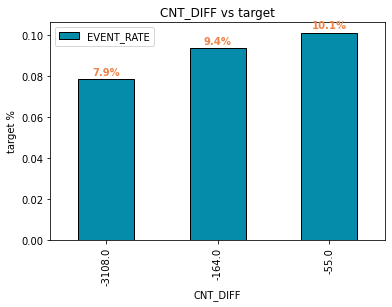

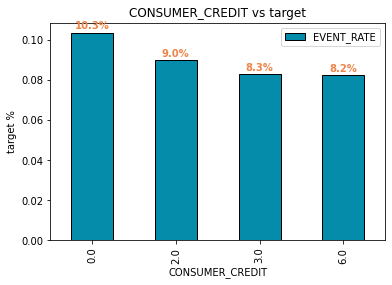

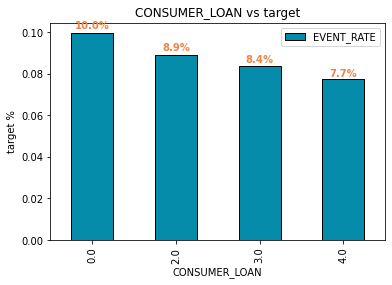

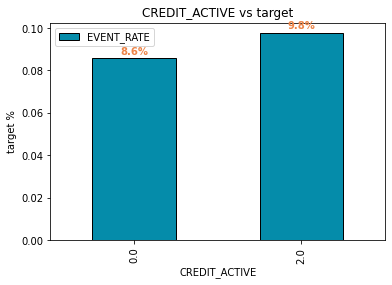

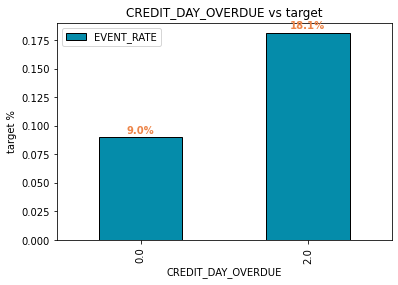

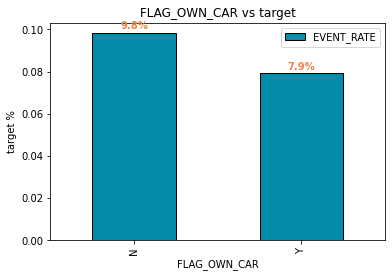

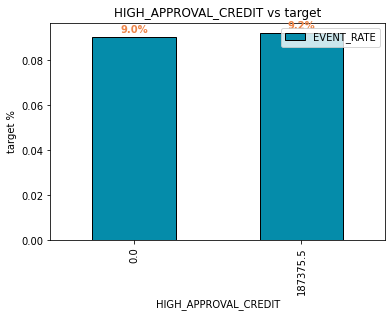

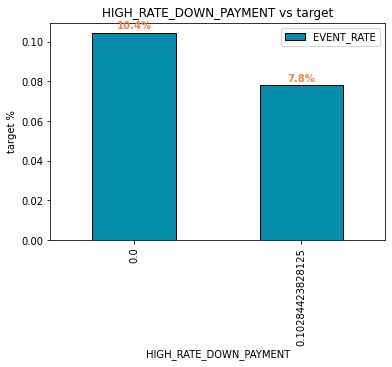

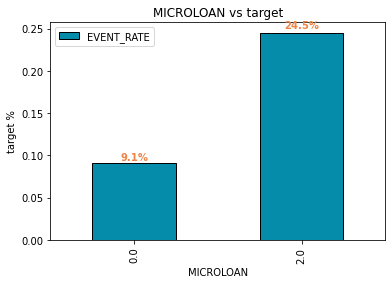

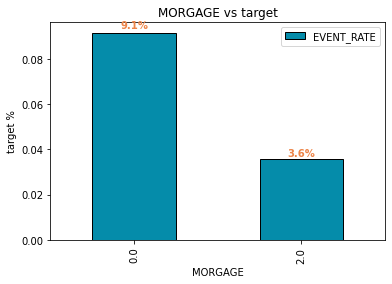

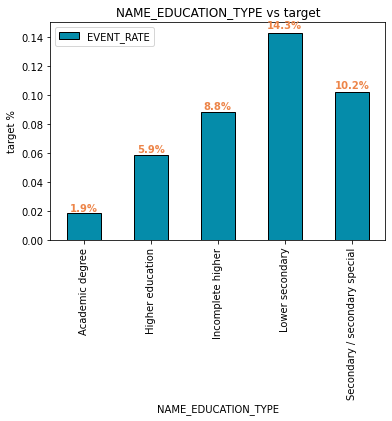

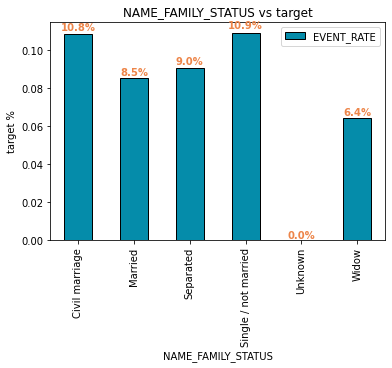

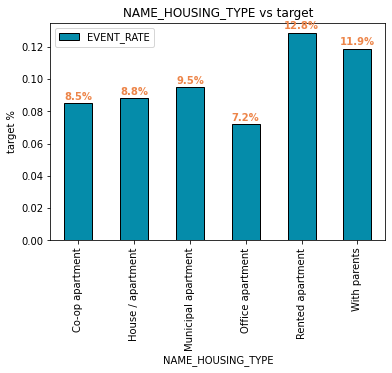

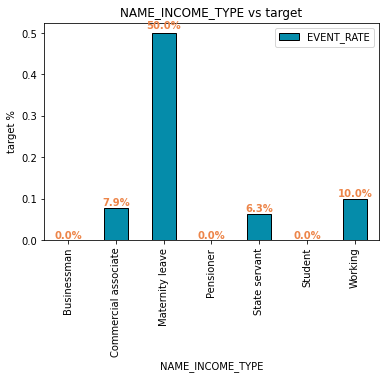

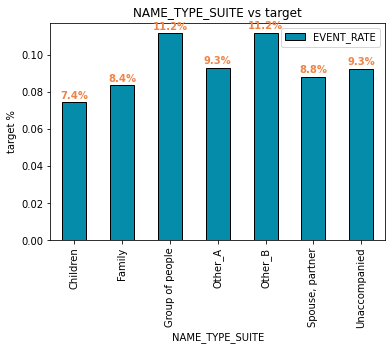

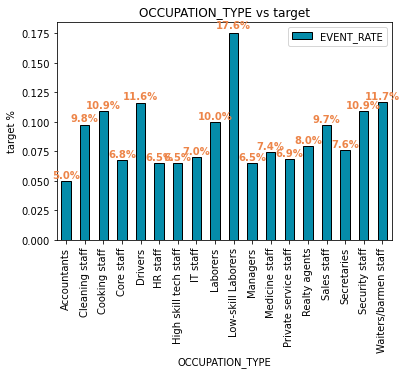

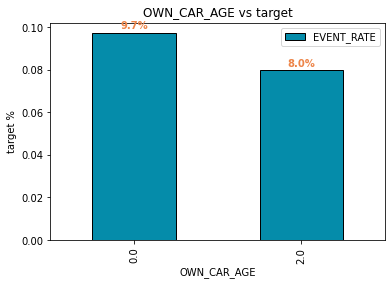

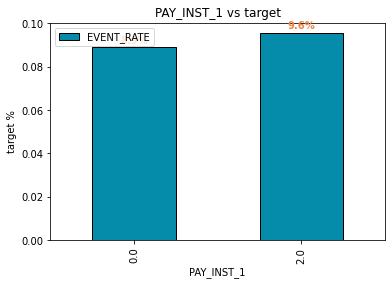

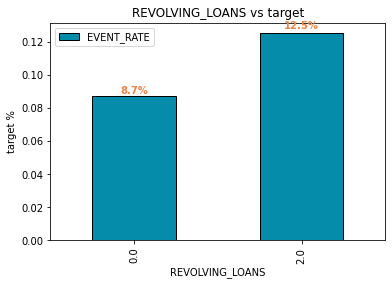

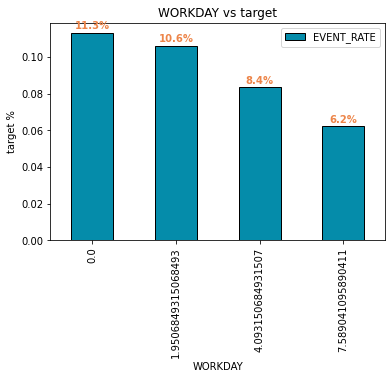

In [86]:
bar_color = '#058caa'
num_color = '#ed8549'

final_iv,_ = data_vars(df_train_clean,df_train_clean['TARGET'])
final_iv = final_iv[(final_iv.VAR_NAME != 'target')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('target') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

## Data Transform

In [87]:
transform_vars_list = df_train_clean.columns.difference(['TARGET'])
transform_prefix = ''
transform_vars_list

Index(['AGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CAR_LOAN', 'CASH_LOAN', 'CNT_CHILDREN',
       'CNT_DIFF', 'CONSUMER_CREDIT', 'CONSUMER_LOAN', 'CREDIT_ACTIVE',
       'CREDIT_DAY_OVERDUE', 'FLAG_OWN_CAR', 'HIGH_APPROVAL_CREDIT',
       'HIGH_RATE_DOWN_PAYMENT', 'MICROLOAN', 'MORGAGE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'OWN_CAR_AGE', 'PAY_INST_1',
       'REVOLVING_LOANS', 'WORKDAY'],
      dtype='object')

In [88]:
df_test = df_test[transform_vars_list]

In [89]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df_train_clean[transform_prefix + var] = df_train_clean[var].apply(lambda x: eval(replace_cmd))
            df_test[transform_prefix + var] = df_test[var].apply(lambda x: eval(replace_cmd))
        except:
            df_train_clean[transform_prefix + var] = df_train_clean[var].apply(lambda x: eval(replace_cmd1))
            df_test[transform_prefix + var] = df_test[var].apply(lambda x: eval(replace_cmd1))


# Model Building

In [90]:
X = df_train_clean.drop('TARGET',axis=1)
y= df_train_clean['TARGET']

In [91]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [92]:
features_train = X_train
label_train = y_train
features_test = X_test
label_test = y_test

## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_lr*100,'%')
print('AUC :',auc_test_lr*100,'%')
print('Precision Test:',precision_test_lr*100,'%')

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy model : 60.22151473028116 %
AUC : 65.24181524649458 %
Precision Test: 62.36505146874215 %


## Decision Tree

In [94]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_dct = accuracy_score(pred_train,label_train)
accuracy_test_dct = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_dct = precision_score(pred_train,label_train)
precision_test_dct = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_dct = recall_score(pred_train,label_train)
recall_test_dct = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_dct = f1_score(pred_train,label_train)
f1_test_dct = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_dct = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_dct = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_dct*100,'%')
print('AUC :',auc_test_dct*100,'%')
print('Precision Test:',precision_test_dct*100,'%')

Accuracy model : 81.8102327249899 %
AUC : 52.0662630305191 %
Precision Test: 15.767009791614361 %


## Naive Baiyes

In [95]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nb = accuracy_score(pred_train,label_train)
accuracy_test_nb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nb = precision_score(pred_train,label_train)
precision_test_nb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nb = recall_score(pred_train,label_train)
recall_test_nb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nb = f1_score(pred_train,label_train)
f1_test_nb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nb = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_nb*100,'%')
print('AUC :',auc_test_nb*100,'%')
print('Precision Test:',precision_test_nb*100,'%')

Accuracy model : 36.46921662705708 %
AUC : 60.430297461125015 %
Precision Test: 79.61335676625659 %


## Linear SVC

In [96]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
clf = LinearSVC()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_svc = accuracy_score(pred_train,label_train)
accuracy_test_svc = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_svc = precision_score(pred_train,label_train)
precision_test_svc = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_svc = recall_score(pred_train,label_train)
recall_test_svc = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_svc = f1_score(pred_train,label_train)
f1_test_svc = f1_score(pred_test,label_test)

from sklearn import metrics
clf_new = CalibratedClassifierCV(clf)
clf_new.fit(features_train,label_train)
pred_proba = clf_new.predict_proba(features_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf_new.predict_proba(features_train)[:,1])
auc_train_svc = metrics.auc(fpr,tpr)
fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf_new.predict_proba(features_test)[:,1])
auc_test_svc = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_svc*100,'%')
print('AUC :',auc_test_svc*100,'%')
print('Precision Test:',precision_test_svc*100,'%')

Accuracy model : 59.97937312228151 %
AUC : 65.23490362487851 %
Precision Test: 62.61611850364047 %


## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(pred_train,label_train)
accuracy_test_rf = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf = precision_score(pred_train,label_train)
precision_test_rf = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf = recall_score(pred_train,label_train)
recall_test_rf = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf = f1_score(pred_train,label_train)
f1_test_rf = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_rf*100,'%')
print('AUC :',auc_test_rf*100,'%')
print('Precision Test:',precision_test_rf*100,'%')

Accuracy model : 90.79637684408772 %
AUC : 60.70207309151735 %
Precision Test: 0.6778809942254582 %


## Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_gb = accuracy_score(pred_train,label_train)
accuracy_test_gb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_gb = precision_score(pred_train,label_train)
precision_test_gb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_gb = recall_score(pred_train,label_train)
recall_test_gb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_gb = f1_score(pred_train,label_train)
f1_test_gb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_gb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_gb = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_gb*100,'%')
print('AUC :',auc_test_gb*100,'%')
print('Precision Test:',precision_test_gb*100,'%')

Accuracy model : 91.01833998475405 %
AUC : 62.00109296584143 %
Precision Test: 0.22596033140848606 %


## Light GBM

In [99]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_lgb = accuracy_score(pred_train,label_train)
accuracy_test_lgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lgb = precision_score(pred_train,label_train)
precision_test_lgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lgb = recall_score(pred_train,label_train)
recall_test_lgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lgb = f1_score(pred_train,label_train)
f1_test_lgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lgb = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_lgb*100,'%')
print('AUC :',auc_test_lgb*100,'%')
print('Precision Test:',precision_test_lgb*100,'%')

Accuracy model : 91.06542307519842 %
AUC : 65.38036043865667 %
Precision Test: 0.0 %


## XGBoost

In [100]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_xgb*100,'%')
print('AUC :',auc_test_xgb*100,'%')
print('Precision Test:',precision_test_xgb*100,'%')

Accuracy model : 91.07663333482805 %
AUC : 64.99767744913223 %
Precision Test: 0.35149384885764495 %


## Neural Network (Multi-layer Perceptron Classifier)

In [101]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nn = accuracy_score(pred_train,label_train)
accuracy_test_nn = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nn = precision_score(pred_train,label_train)
precision_test_nn = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nn = recall_score(pred_train,label_train)
recall_test_nn = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nn = f1_score(pred_train,label_train)
f1_test_nn = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_nn*100,'%')
print('AUC :',auc_test_nn*100,'%')
print('Precision Test:',precision_test_nn*100,'%')

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy model : 84.9737679924667 %
AUC : 60.399349689465645 %
Precision Test: 14.963595279939742 %


## Summary

In [102]:
summary_model = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','XGBoost','Light GBM','MLP Classifier','Linear SVC','Naive Baiyes','Gradient Boosting'],
                            'Accuracy Model':list(np.array([accuracy_test_lr,accuracy_test_dct,accuracy_test_rf,accuracy_test_xgb,accuracy_test_lgb,accuracy_test_nn,accuracy_test_svc,accuracy_test_nb,accuracy_test_gb])*100),
                            'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                            'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_nn,auc_train_svc,auc_train_nb,auc_train_gb])*100),
                            'Precision Test':list(np.array([precision_test_lr,precision_test_dct,precision_test_rf,precision_test_xgb,precision_test_lgb,precision_test_nn,precision_test_svc,precision_test_nb,precision_test_gb])*100),
                            'Precision Train':list(np.array([precision_train_lr,precision_train_dct,precision_train_rf,precision_train_xgb,precision_train_lgb,precision_train_nn,precision_train_svc,precision_train_nb,precision_train_gb])*100)})
summary_model.sort_values('AUC Test',ascending=False)

,Model,Accuracy Model,AUC Test,AUC Train,Precision Test,Precision Train
4,Light GBM,91.065423,65.380360,96.741107,0.000000,89.589479
0,Logistic Regression,60.221515,65.241815,67.052199,62.365051,64.320098
6,Linear SVC,59.979373,65.234904,67.053369,62.616119,64.570656
3,XGBoost,91.076633,64.997677,97.129315,0.351494,89.803626
8,Gradient Boosting,91.018340,62.001093,96.198048,0.225960,87.448623
2,Random Forest,90.796377,60.702073,99.998643,0.677881,99.877189
7,Naive Baiyes,36.469217,60.430297,66.832182,79.613357,86.229156
5,MLP Classifier,84.973768,60.399350,93.028016,14.963595,79.330157
1,Decision Tree,81.810233,52.066263,99.999826,15.767010,99.845098


## Hyperparameter Tuning

### Base Model

In [103]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_lr*100,'%')
print('Precision Test :',precision_test_lr*100,'%')
print('Precision Train :',precision_train_lr*100,'%')
print('AUC Train:',auc_test_lr*100,'%')
print('AUC Test:',auc_train_lr*100,'%')

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy model : 60.22151473028116 %
Precision Test : 62.36505146874215 %
Precision Train : 64.32009775484762 %
AUC Train: 65.24181524649458 %
AUC Test: 67.0521985199835 %


### GridSearchCV

In [104]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = np.linspace(0.1,0.5,5) # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
hyperparameters = dict(penalty=penalty, C=C,solver=solver)
# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = GridSearchCV(logres, hyperparameters, cv=10,scoring='roc_auc',n_jobs=-1)

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(print(model.best_params_))

{'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'lbfgs'}
None


In [105]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 0.5,penalty= 'l2', solver ='liblinear')

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)

print('Accuracy model :',accuracy_test_lr*100,'%')
print('Precision Test :',precision_test_lr*100,'%')
print('Precision Train :',precision_train_lr*100,'%')
print('AUC Train:',auc_test_lr*100,'%')
print('AUC Test:',auc_train_lr*100,'%')

Accuracy model : 60.225998834133 %
Precision Test : 62.39015817223199 %
Precision Train : 64.30281785753958 %
AUC Train: 65.25497835630821 %
AUC Test: 67.05329395937417 %


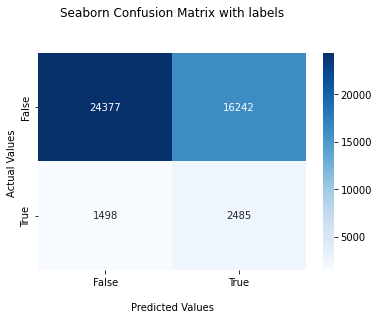

In [106]:
y_pred = clf.predict(features_test)
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#ROC Curve
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# Feature Importance

In [107]:
importance = np.absolute(clf.coef_[0])
column_importance =features_test.columns.tolist()

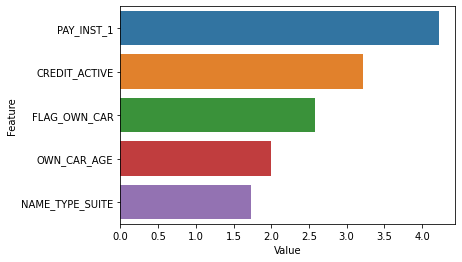

In [108]:
imp = pd.DataFrame({'Feature':column_importance,'Value':importance})
imp = imp.sort_values('Value',ascending=False)[:5]
sns.barplot(y='Feature',x='Value',data=imp)
plt.show()

In [109]:
df_selected = import_data('data_features.csv')
df_selected.head()

Memory usage of dataframe is 59.55 MB
Memory usage after optimization is: 25.52 MB
Decreased by 57.1%


,Unnamed: 0,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,HIGH_APPROVAL_CREDIT,HIGH_RATE_DOWN_PAYMENT,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,CONSUMER_CREDIT,CAR_LOAN,MORGAGE,MICROLOAN,PAY_INST_1,CNT_DIFF
0,0,100002,1,N,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,...,179055.0,0.000000,2.0,0.0,4.0,0.0,0.0,0.0,0.0,-171.0
1,1,100003,0,N,0,270000.0,1293502.5,Family,State servant,Higher education,...,1035882.0,0.100037,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-121.0
2,2,100004,0,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,20106.0,0.212036,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-6.0
3,3,100006,0,N,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,...,906615.0,0.217773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-67.0
4,4,100007,0,N,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,...,284400.0,0.218872,0.0,0.0,1.0,0.0,0.0,0.0,4.0,-420.0


## Own Car

In [110]:
df_own_car = df_selected.groupby(['FLAG_OWN_CAR'])['SK_ID_CURR'].count().reset_index()
df_own_car_1 = df_selected[df_selected['TARGET']==1]
df_own_car_1 = df_own_car_1.groupby(['FLAG_OWN_CAR'])['SK_ID_CURR'].count().reset_index()

In [111]:
df_own_car['TARGET %'] =  df_own_car_1['SK_ID_CURR']/df_own_car['SK_ID_CURR']*100

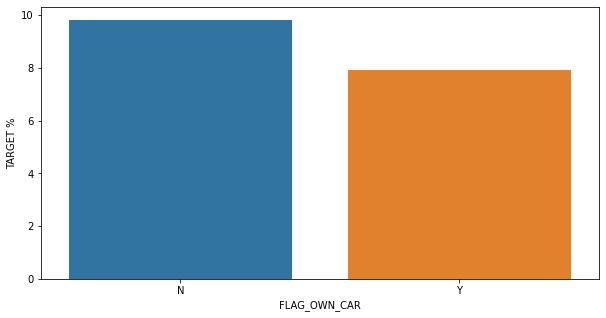

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(x='FLAG_OWN_CAR',y='TARGET %',data=df_own_car)
plt.show()

## Pay Installment

In [113]:
df_pay_inst = df_selected.groupby(['PAY_INST_1'])['SK_ID_CURR'].count().reset_index()
df_pay_inst_1 = df_selected[df_selected['TARGET']==1]
df_pay_inst_1 = df_pay_inst_1.groupby(['PAY_INST_1'])['SK_ID_CURR'].count().reset_index()

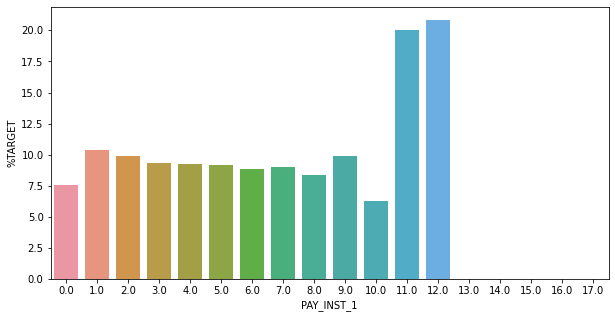

In [114]:
df_pay_inst['%TARGET'] =  df_pay_inst_1['SK_ID_CURR']/df_pay_inst['SK_ID_CURR']*100
plt.figure(figsize=(10,5))
sns.barplot(x='PAY_INST_1',y='%TARGET',data=df_pay_inst)
plt.show()

## Credit Active

In [115]:
CREDIT_ACTIVE = df_selected.groupby(['CREDIT_ACTIVE'])['SK_ID_CURR'].count().reset_index()
CREDIT_ACTIVE_1 = df_selected[df_selected['TARGET']==1]
CREDIT_ACTIVE_1 = CREDIT_ACTIVE_1.groupby(['CREDIT_ACTIVE'])['SK_ID_CURR'].count().reset_index()
CREDIT_ACTIVE['%TARGET'] =  CREDIT_ACTIVE_1['SK_ID_CURR']/CREDIT_ACTIVE['SK_ID_CURR']*100

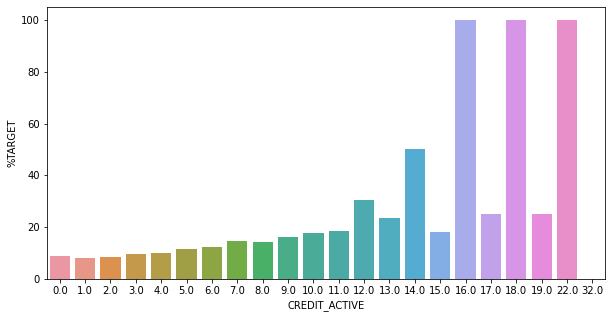

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(x='CREDIT_ACTIVE',y='%TARGET',data=CREDIT_ACTIVE)
plt.show()

## Credit Scoring

In [117]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [118]:
scores_train = scoring(features_train,clf,label_train)
scores_test = scoring(features_test,clf,label_test)

In [119]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,32408.000000,23094.000000,9314.000000,71.260183,23094.000000,9314.000000,14.252212,5.748034,8.504178
2.0,32407.000000,21727.000000,10680.000000,67.044157,44821.000000,19994.000000,27.660796,12.339081,15.321715
3.0,32408.000000,20069.000000,12339.000000,61.926068,64890.000000,32333.000000,40.046162,19.953961,20.092201
4.0,32407.000000,18835.000000,13572.000000,58.120159,83725.000000,45905.000000,51.669979,28.329774,23.340204
5.0,32408.000000,17358.000000,15050.000000,53.560849,101083.000000,60955.000000,62.382281,37.617719,24.764561
6.0,32407.000000,15968.000000,16439.000000,49.273305,117051.000000,77394.000000,72.236759,47.762870,24.473889
7.0,32408.000000,14579.000000,17829.000000,44.985806,131630.000000,95223.000000,81.234032,58.765845,22.468186
8.0,32407.000000,12647.000000,19760.000000,39.025519,144277.000000,114983.000000,89.038991,70.960515,18.078475


In [120]:
credit_scoring = scores_train.groupby('DECILE').agg({'SCORE':['min','max']}).reset_index()
credit_scoring.columns = ['DECILE','MIN','MAX']

In [121]:
credit_scoring.to_csv('credit_scoring.csv')

In [122]:
max_score = credit_scoring['MAX']
max_score = max_score.to_list()

X_test_col = X_test.copy()
X_test_col['pred_prob'] = pred_proba

In [123]:
array= np.array(X_test_col['pred_prob'])
bins= max_score
bin_indices  = np.digitize(array, bins)
bin_indices = list(bin_indices)

<AxesSubplot:>

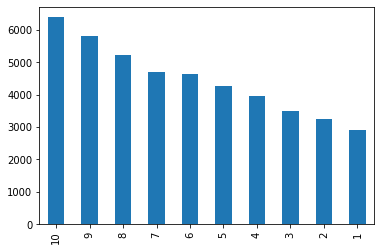

In [124]:
X_test_col['DECILE'] = bin_indices

X_test_col['DECILE'].value_counts().plot(kind='bar')

In [125]:
X_test_col['y_pred'] = pred_test
X_test_col['y_test'] = label_test

In [126]:
df_score = X_test_col.groupby('DECILE')['y_test'].count().reset_index()
df_score.columns = ['DECILE','Count of Applicants']
df_score

,DECILE,Count of Applicants
0,1,2911
1,2,3243
2,3,3498
3,4,3942
4,5,4274
5,6,4639
6,7,4686
7,8,5211
8,9,5805
9,10,6393


<AxesSubplot:xlabel='DECILE', ylabel='Count of Applicants'>

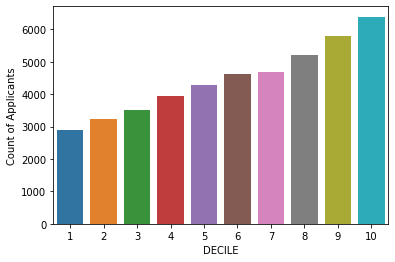

In [127]:
sns.barplot(x='DECILE',y='Count of Applicants',data=df_score)

In [128]:
credit_scoring

,DECILE,MIN,MAX
0,1.0,0.687822,0.951984
1,2.0,0.632274,0.687821
2,3.0,0.588450,0.632271
3,4.0,0.548114,0.588450
4,5.0,0.507799,0.548112
5,6.0,0.466037,0.507799
6,7.0,0.421025,0.466036
7,8.0,0.368006,0.421023
8,9.0,0.296406,0.368001
9,10.0,0.033562,0.296404


# Impact for business

In [129]:
df_app = import_data('data_features.csv')
df_raw = import_data('application_train.csv')

Memory usage of dataframe is 59.55 MB
Memory usage after optimization is: 25.52 MB
Decreased by 57.1%
Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


In [130]:
amount_credit = df_raw[['SK_ID_CURR','AMT_CREDIT']]
df_app = df_app.merge(amount_credit,how='left',on='SK_ID_CURR')
df_app

,Unnamed: 0,SK_ID_CURR,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,HIGH_RATE_DOWN_PAYMENT,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,CONSUMER_CREDIT,CAR_LOAN,MORGAGE,MICROLOAN,PAY_INST_1,CNT_DIFF,AMT_CREDIT_y
0,0,100002,1,N,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,...,0.000000,2.0,0.0,4.0,0.0,0.0,0.0,0.0,-171.0,406597.5
1,1,100003,0,N,0,270000.0,1293502.5,Family,State servant,Higher education,...,0.100037,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-121.0,1293502.5
2,2,100004,0,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0.212036,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-6.0,135000.0
3,3,100006,0,N,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,...,0.217773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-67.0,312682.5
4,4,100007,0,N,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,...,0.218872,0.0,0.0,1.0,0.0,0.0,0.0,4.0,-420.0,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223003,307501,456245,0,N,3,81000.0,269550.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,269550.0
223004,307503,456247,0,N,0,112500.0,345510.0,Unaccompanied,Commercial associate,Higher education,...,0.105103,3.0,0.0,9.0,0.0,1.0,0.0,2.0,-96.0,345510.0
223005,307506,456251,0,N,0,157500.0,254700.0,Unaccompanied,Working,Secondary / secondary special,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-28.0,254700.0
223006,307509,456254,1,N,0,171000.0,370107.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-91.0,370107.0


In [131]:
feature_app = df_app.drop('TARGET',axis=1)
label_app = df_app['TARGET']

In [132]:
feature_app_train,feature_app_test,label_train,label_test = train_test_split(feature_app,label_app,test_size=0.2, random_state=7)


In [133]:
feature_app = df_app.drop('TARGET',axis=1)
label_app = df_app['TARGET']

In [134]:
feature_app_test['y_pred'] = pred_test
feature_app_test['y_test'] = label_test

In [135]:
feature_app_test

,Unnamed: 0,SK_ID_CURR,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,CREDIT_DAY_OVERDUE,CONSUMER_CREDIT,CAR_LOAN,MORGAGE,MICROLOAN,PAY_INST_1,CNT_DIFF,AMT_CREDIT_y,y_pred,y_test
51617,71235,182621,N,1,90000.0,343800.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,5.0,0.0,0.0,0.0,0.0,-78.0,343800.0,1,0
176156,242920,381213,N,2,202500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,-119.0,270000.0,1,0
152946,210854,344351,Y,0,157500.0,225000.0,Unaccompanied,Working,Incomplete higher,Single / not married,...,0.0,0.0,0.0,0.0,0.0,2.0,-76.0,225000.0,0,0
188267,259703,400542,N,1,117000.0,157500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,0.0,6.0,0.0,0.0,0.0,3.0,-2040.0,157500.0,1,0
138514,191014,321482,Y,0,132673.5,409500.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,...,0.0,5.0,1.0,0.0,0.0,1.0,-120.0,409500.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169028,233031,369906,Y,0,180000.0,808650.0,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,2.0,0.0,0.0,0.0,1.0,-99.0,808650.0,0,0
174053,239983,377900,N,0,99000.0,277969.5,Unaccompanied,Working,Secondary / secondary special,Married,...,0.0,4.0,0.0,0.0,0.0,0.0,-99.0,277969.5,0,0
51080,70513,181805,N,0,225000.0,1325475.0,Unaccompanied,State servant,Higher education,Married,...,0.0,6.0,0.0,0.0,0.0,1.0,-21.0,1325475.0,0,0
18792,25943,130168,N,1,157500.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,...,0.0,4.0,0.0,0.0,0.0,1.0,-253.0,450000.0,0,1


In [136]:
total_kredit_konvensional = feature_app_test['AMT_CREDIT_y'].sum()
total_kredit_default = feature_app_test[feature_app_test['y_test']==1]['AMT_CREDIT_y'].sum()
profitability_konvensional = total_kredit_konvensional-total_kredit_default
percentage_profitability_konvensional = profitability_konvensional/total_kredit_konvensional

In [137]:
total_kredit_model = feature_app_test['AMT_CREDIT_y'][feature_app_test['y_pred']==1].sum()
total_kredit_default_model = feature_app_test[(feature_app_test['y_pred']==1)&(feature_app_test['y_test']==1)]['AMT_CREDIT_y'].sum()
profitability_model = total_kredit_model-total_kredit_default_model
percentage_profitability_model = profitability_model/total_kredit_model

In [138]:
amount_of_default_credit = pd.DataFrame({'Metode':['Conventional','Model'],
                            'amount of default credit':[total_kredit_default,total_kredit_default_model]})

In [139]:
amount_of_default_credit

,Metode,amount of default credit
0,Conventional,2.171834e+09
1,Model,1.268768e+09


In [140]:
amount_of_default_credit.to_csv('amount of default credit.csv')

In [141]:
total_app = feature_app_test.shape[0]
default_app = feature_app_test[feature_app_test['y_test']==1].shape[0]
percent_default = default_app/total_app

In [142]:
total_model = feature_app_test[(feature_app_test['y_pred']==0)].shape[0]
default_model = feature_app_test[(feature_app_test['y_pred']==0)&(feature_app_test['y_test']==1)].shape[0]
percent_default_model = default_model/total_model

In [143]:
default_impact = pd.DataFrame({'Metode':['Conventional','Model'],
                            'Impact %':[percent_default,percent_default_model]})

<AxesSubplot:xlabel='Metode', ylabel='Impact %'>

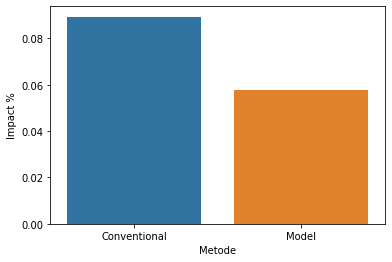

In [144]:
sns.barplot(x='Metode',y='Impact %',data=default_impact)

In [145]:
default_impact

,Metode,Impact %
0,Conventional,0.089301
1,Model,0.057894


In [146]:
default_impact.to_csv('default_impact.csv')

# Testing

In [147]:
pred_test = clf.predict(df_test)
pred_proba = clf.predict_proba(df_test)[:,1]

In [148]:
df_test_new = import_data('application_test.csv')
df_test_new['TARGET'] = pred_test
df_test_new['pred_proba'] = pred_proba

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


In [149]:
submission = df_test_new[['SK_ID_CURR','pred_proba']]
submission.to_csv('submission.csv')

In [150]:
segment_creditors = df_test_new[['SK_ID_CURR','pred_proba']]
array= np.array(segment_creditors['pred_proba'])
bins= max_score
bin_indices  = np.digitize(array, bins)
bin_indices = list(bin_indices)

In [151]:
segment_creditors ['DECILE'] = bin_indices
segment_creditors = segment_creditors.groupby('DECILE')['SK_ID_CURR'].count().reset_index()
segment_creditors.columns = ['DECILE','Count']

In [152]:
segment_creditors

,DECILE,Count
0,0,394
1,1,8040
2,2,2318
3,3,1934
4,4,1772
5,5,1960
6,6,2280
7,7,2926
8,8,3897
9,9,6188


<AxesSubplot:xlabel='DECILE', ylabel='Count'>

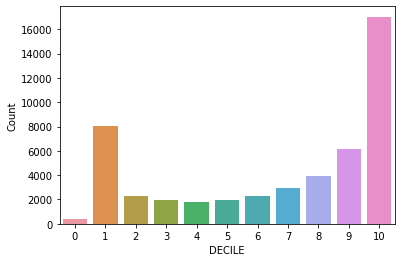

In [153]:
sns.barplot(x='DECILE',y='Count',data=segment_creditors)